# Minimum flip bits for int8 attacks, (paper)

In [1]:
import PyPDF2
import numpy as np
from scipy.spatial.distance import hamming

In [63]:
def extract_words_from_pdf(file_path):
    pdf_file = open(file_path, 'rb')
    reader = PyPDF2.PdfReader(pdf_file)

    word_array = []
    for page in reader.pages:
        text = page.extract_text()
        words = text.split()
        word_array.extend(words)

    pdf_file.close()
    return word_array

In [64]:
# def table_code_words(input_array):
#
#     table_code_words = np.zeros((256,), dtype=np.ndarray)
#
#     for i in range(256):
#         table_code_words[i] = input_array[3 + i*4]
#
#     return table_code_words

In [65]:
def table_binary_code_words(input_array, add, length):

    table_code_words_binary = np.zeros((256,), dtype=np.ndarray)

    # adding 0 to the table
    table_code_words_binary[128] = [int(bit) for bit in bin(0)[2:].zfill(length)]

    for i in range(255):
        if i < 127:
            # adding numbers from 1 to 127
            table_code_words_binary[i + 129] = [int(bit) for bit in input_array[add + i*(add + 1)]]
        else:
            # adding numbers from -128 to -1
            table_code_words_binary[i - 127] = [int(bit) for bit in input_array[add + i*(add + 1)]]

    return table_code_words_binary

In [66]:
pdf_file_path = "D:\DP\DP\Code\HammingCode(12,8,3)_C12-3.pdf"
C_12_3 = extract_words_from_pdf(pdf_file_path)

In [67]:
# Print the extracted text
for text in C_12_3:
    print(text)


1
00000001
4095
111111111111
2
00000010
2030
011111101110
3
00000011
2065
100000010001
4
00000100
1663
011001111111
5
00000101
2432
100110000000
6
00000110
401
000110010001
7
00000111
3694
111001101110
8
00001000
1471
010110111111
9
00001001
2624
101001000000
10
00001010
593
001001010001
11
00001011
3502
110110101110
12
00001100
960
001111000000
13
00001101
3135
110000111111
14
00001110
1070
010000101110
15
00001111
3025
101111010001
16
00010000
991
001111011111
17
00010001
3104
110000100000
18
00010010
1073
010000110001
19
00010011
3022
101111001110
20
00010100
1440
010110100000
21
00010101
2655
101001011111
22
00010110
590
001001001110
23
00010111
3505
110110110001
24
00011000
1632
011001100000
25
00011001
2463
100110011111
26
00011010
398
000110001110
27
00011011
3697
111001110001
28
00011100
31
000000011111
29
00011101
4064
111111100000
30
00011110
2033
011111110001
31
00011111
2062
100000001110
32
00100000
4039
111111000111
33
00100001
56
000000111000
34
00100010
2089
100000101001

In [68]:
table_code_words_binary = table_binary_code_words(C_12_3, 3, 12)
print(table_code_words_binary)

print(table_code_words_binary[0])
print(table_code_words_binary[1])
print(table_code_words_binary[128])
print(table_code_words_binary[129])
print(table_code_words_binary[254])
print(table_code_words_binary[255])

[list([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])
 list([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])
 list([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])
 list([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
 list([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])
 list([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])
 list([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])
 list([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])
 list([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])
 list([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])
 list([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])
 list([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
 list([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])
 list([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1])
 list([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0])
 list([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])
 list([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])
 list([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0])
 list([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])
 list([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])
 list([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])
 list([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])
 list([1, 1, 0, 1, 0, 0, 1, 1, 0

In [69]:
table_hamming_distance = np.full((256,256), 255, dtype=np.uint8)
np.fill_diagonal(table_hamming_distance, 0)
print(table_hamming_distance)

[[  0 255 255 ... 255 255 255]
 [255   0 255 ... 255 255 255]
 [255 255   0 ... 255 255 255]
 ...
 [255 255 255 ...   0 255 255]
 [255 255 255 ... 255   0 255]
 [255 255 255 ... 255 255   0]]


In [70]:
for i in range(256):
    for j in range(256):
        if i != j:
            code_word_bin = table_code_words_binary[i]
            code_word_bin_2 = table_code_words_binary[j]
            table_hamming_distance[i][j] = hamming(code_word_bin, code_word_bin_2) * len(code_word_bin)



In [71]:
print(table_hamming_distance)

[[ 0 12  9 ...  4  5  7]
 [12  0  3 ...  8  7  5]
 [ 9  3  0 ...  7  8  4]
 ...
 [ 4  8  7 ...  0  3  9]
 [ 5  7  8 ...  3  0 12]
 [ 7  5  4 ...  9 12  0]]


In [72]:
def create_min_hd_table(file_name, pdf_file_path, save, add, length):

    table_code_words_binary = table_binary_code_words(extract_words_from_pdf(pdf_file_path), add, length)
    table_hamming_distance = np.full((256,256), 255, dtype=np.uint8)
    np.fill_diagonal(table_hamming_distance, 0)

    for i in range(256):
        for j in range(256):
            if i != j:
                code_word_bin = table_code_words_binary[i]
                code_word_bin_2 = table_code_words_binary[j]
                table_hamming_distance[i][j] = hamming(code_word_bin, code_word_bin_2) * len(code_word_bin)

    if save:
        np.save("./" + file_name, table_hamming_distance)
    else:
        return table_hamming_distance


In [73]:
create_min_hd_table("min_hd_table_C12-3", "D:\DP\DP\Code\HammingCode(12,8,3)_C12-3.pdf", True, 3, 12)
create_min_hd_table("min_hd_table_C13-4", "D:\DP\DP\Code\Hamming Code (13,8,4)-C(13,4).pdf", True, 2, 13)
create_min_hd_table("min_hd_table_C14-4", "D:\DP\DP\Code\Code (14,8,4)-C(14,4).pdf", True, 2, 14)

In [74]:
pdf_file_path = "D:\DP\DP\Code\Hamming Code (13,8,4)-C(13,4).pdf"
C_12_3 = extract_words_from_pdf(pdf_file_path)
# Print the extracted text
for text in C_12_3:
    print(text)



100000001
4095
0111111111111
200000010
6126
1011111101110
300000011
6161
1100000010001
400000100
5759
1011001111111
500000101
6528
1100110000000
600000110
401
0000110010001
700000111
3694
0111001101110
800001000
5567
1010110111111
900001001
6720
1101001000000
1000001010
593
0001001010001
1100001011
3502
0110110101110
1200001100
960
0001111000000
1300001101
3135
0110000111111
1400001110
5166
1010000101110
1500001111
7121
1101111010001
1600010000
5087
1001111011111
1700010001
7200
1110000100000
1800010010
1073
0010000110001
1900010011
3022
0101111001110
2000010100
1440
0010110100000
2100010101
2655
0101001011111
2200010110
4686
1001001001110
2300010111
7601
1110110110001
2400011000
1632
0011001100000
2500011001
2463
0100110011111
2600011010
4494
1000110001110
2700011011
7793
1111001110001
2800011100
4127
1000000011111
2900011101
8160
1111111100000
3000011110
2033
0011111110001
3100011111
2062
0100000001110
3200100000
8135
1111111000111
3300100001
4152
1000000111000
3400100010
2089
010000

In [75]:
pdf_file_path = "D:\DP\DP\Code\Code (14,8,4)-C(14,4).pdf"
C_12_3 = extract_words_from_pdf(pdf_file_path)
# Print the extracted text
for text in C_12_3:
    print(text)

100000001
12287
10111111111111
200000010
14318
11011111101110
300000011
6161
01100000010001
400000100
13951
11011001111111
500000101
6528
01100110000000
600000110
401
00000110010001
700000111
11886
10111001101110
800001000
13759
11010110111111
900001001
6720
01101001000000
1000001010
593
00001001010001
1100001011
11694
10110110101110
1200001100
960
00001111000000
1300001101
11327
10110000111111
1400001110
13358
11010000101110
1500001111
7121
01101111010001
1600010000
13279
11001111011111
1700010001
7200
01110000100000
1800010010
1073
00010000110001
1900010011
11214
10101111001110
2000010100
1440
00010110100000
2100010101
10847
10101001011111
2200010110
12878
11001001001110
2300010111
7601
01110110110001
2400011000
1632
00011001100000
2500011001
10655
10100110011111
2600011010
12686
11000110001110
2700011011
7793
01111001110001
2800011100
12319
11000000011111
2900011101
8160
01111111100000
3000011110
2033
00011111110001
3100011111
10254
10100000001110
3200100000
16327
11111111000111
330

In [76]:
min_hd_table_C12_3 = create_min_hd_table("min_hd_table_C12-3", "D:\DP\DP\Code\HammingCode(12,8,3)_C12-3.pdf", False, 3, 12)
min_hd_table_C13_4 = create_min_hd_table("min_hd_table_C13-4", "D:\DP\DP\Code\Hamming Code (13,8,4)-C(13,4).pdf", False, 2, 13)
min_hd_table_C14_4 = create_min_hd_table("min_hd_table_C14-4", "D:\DP\DP\Code\Code (14,8,4)-C(14,4).pdf", False, 2, 14)

In [77]:
def hd_weights(min_hd_table_1, min_hd_table_2,  min_hd_table_3, weights):

    tbcw_1 = table_binary_code_words(extract_words_from_pdf("D:\DP\DP\Code\HammingCode(12,8,3)_C12-3.pdf"), 3, 12)
    tbcw_2 = table_binary_code_words(extract_words_from_pdf("D:\DP\DP\Code\Hamming Code (13,8,4)-C(13,4).pdf"), 2, 13)
    tbcw_3 = table_binary_code_words(extract_words_from_pdf("D:\DP\DP\Code\Code (14,8,4)-C(14,4).pdf"), 2, 14)

    hd_0 = np.zeros([100])
    hd_1 = np.zeros([100])
    hd_2 = np.zeros([100])
    hd_3 = np.zeros([100])

    for i in range(100):
        for z, y in zip(weights[i][0], weights[i][1]):
            if z != y:
                print(z)
                print(y)

                if z < 0:
                    z_1 = 256 + z
                else:
                    z_1 = z
                if y < 0:
                    y_1 = 256 + y
                else:
                    y_1 = y

                bin_z = [int(bit_z) for bit_z in bin(int(z_1))[2:].zfill(8)]
                bin_y = [int(bit_y) for bit_y in bin(int(y_1))[2:].zfill(8)]
                hd_0[i] += hamming(bin_z, bin_y) * len(bin_z)

                print(bin_z)
                print(bin_y)
                print(hamming(bin_z, bin_y) * len(bin_z))
                print('-'*10)

                hd_1[i] += min_hd_table_1[int(z)+128][int(y)+128]

                print(tbcw_1[int(z)+128])
                print(tbcw_1[int(y)+128])
                print(min_hd_table_1[int(z)+128][int(y)+128])
                print('-'*10)

                hd_2[i] += min_hd_table_2[int(z)+128][int(y)+128]

                print(tbcw_2[int(z)+128])
                print(tbcw_2[int(y)+128])
                print(min_hd_table_2[int(z)+128][int(y)+128])
                print('-'*10)

                hd_3[i] += min_hd_table_3[int(z)+128][int(y)+128]

                print(tbcw_3[int(z)+128])
                print(tbcw_3[int(y)+128])
                print(min_hd_table_3[int(z)+128][int(y)+128])
                print('-'*10)

                print('#'*10)
                print('#'*10)

        print("??"*10)

    hd_0_mean = np.mean(hd_0)
    hd_1_mean = np.mean(hd_1)
    hd_2_mean = np.mean(hd_2)
    hd_3_mean = np.mean(hd_3)

    hd_0_std = np.std(hd_0)
    hd_1_std = np.std(hd_1)
    hd_2_std = np.std(hd_2)
    hd_3_std = np.std(hd_3)

    return hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std




In [78]:
weights_res = np.load("./result/100_res_type3_from8_to1/weights.npy", allow_pickle=True)

In [79]:
# hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std = hd_weights(min_hd_table_C12_3, min_hd_table_C13_4, min_hd_table_C14_4, weights_res)
# print(hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std)

In [80]:
weights_vgg = np.zeros((100,), dtype=np.ndarray)
for i in range(100):
    weights_vgg[i] = np.load("./result/100_vgg_type3_from8_to1\weights\weights_"+ str(i) +".npy", allow_pickle=True)

print(weights_vgg)

[array([array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object),
        array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object)],
       dtype=object)
 array([array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object),
        array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object)],
       dtype=object)
 array([array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object),
        array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object)],
       dtype=object)
 array([array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object),
        array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object)],
       dtype=object)
 array([array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object),
        array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object)],
       dtype=object)
 array([array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object),
        array([-25.0, 42.0, -2.0, ..., 0.0, 1.0, -2.0], dtype=object)],
       dtype=object)
 array([array([-

In [81]:
# weights_vgg[1][0]

In [82]:
# weights_res[1][0]

In [83]:
# print(weights_res)

In [84]:
# hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std = hd_weights(min_hd_table_C12_3, min_hd_table_C13_4, min_hd_table_C14_4, weights_vgg)
# print(hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std)

In [85]:
#-1 127

# Number of weights

In [86]:
# weights_res = np.load("./result/100_res_type3_from8_to1/weights.npy", allow_pickle=True)

In [87]:
# weights_vgg = np.zeros((100,), dtype=np.ndarray)
# for i in range(100):
#     weights_vgg[i] = np.load("./result/100_vgg_type3_from8_to1\weights\weights_"+ str(i) +".npy", allow_pickle=True)

In [88]:
# def count_weights(weights):
#     weights_num = np.zeros([100])
#     for i in range(100):
#         weights_num[i] = len(weights[i][0])
#     return weights_num, np.mean(weights_num), np.std(weights_num)

# most impactful representation for sign bit

In [3]:
def twos_comp(val_str, bytes=1):
    import sys
    val = int(val_str, 2)
    b = val.to_bytes(bytes, byteorder=sys.byteorder, signed=False)
    return int.from_bytes(b, byteorder=sys.byteorder, signed=True)

def twos_comp_bits(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val                         # return positive value as is



def make_table_sign(array, length,  file_name, save, bit):


    tbcw_new = np.zeros((256, length))

    for i in range(256):

        num = i - 128

        if num >= 0:
            bin_n = bin(num)[2:].zfill(bit)
        else:
            bin_n = bin(num & (2 ** bit - 1))[2:]

        new_num = twos_comp(bin_n[::-1])

        print(i, num, bin_n, bin_n[::-1], new_num)
        tbcw_new[new_num + 128] = array[i]


    table_hamming_distance = np.full((256,256), 255, dtype=np.uint8)
    np.fill_diagonal(table_hamming_distance, 0)


    for i in range(256):
        for j in range(256):
            if i != j:
                code_word_bin = tbcw_new[i]
                code_word_bin_2 = tbcw_new[j]
                table_hamming_distance[i][j] = hamming(code_word_bin, code_word_bin_2) * len(code_word_bin)


    print('-----------------')

    if save:
        # pass
        np.save("./signbit_tbcw_" + file_name, tbcw_new)
        np.save("./signbit_min_hd_table_" + file_name, table_hamming_distance)
    else:
        return tbcw_new, table_hamming_distance


tbcw_1 = table_binary_code_words(extract_words_from_pdf("D:\DP\DP\Code\HammingCode(12,8,3)_C12-3.pdf"), 3, 12)
tbcw_2 = table_binary_code_words(extract_words_from_pdf("D:\DP\DP\Code\Hamming Code (13,8,4)-C(13,4).pdf"), 2, 13)
tbcw_3 = table_binary_code_words(extract_words_from_pdf("D:\DP\DP\Code\Code (14,8,4)-C(14,4).pdf"), 2, 14)

make_table_sign(tbcw_1, 12, "C12_3", True, 8)
make_table_sign(tbcw_2, 13, "C13_4", True, 8)
make_table_sign(tbcw_3, 14, "C14_4", True, 8)

NameError: name 'table_binary_code_words' is not defined

In [8]:
def hd_weights_2(min_hd_table_1, min_hd_table_2,  min_hd_table_3, weights):

    tbcw_1 = np.load("./tables_hd_bcw/signbit_tbcw_C12_3.npy", allow_pickle=True)
    tbcw_2 = np.load("./tables_hd_bcw/signbit_tbcw_C13_4.npy", allow_pickle=True)
    tbcw_3 = np.load("./tables_hd_bcw/signbit_tbcw_C14_4.npy", allow_pickle=True)


    hd_0 = np.zeros([100])
    hd_1 = np.zeros([100])
    hd_2 = np.zeros([100])
    hd_3 = np.zeros([100])

    for i in range(100):
        for z, y in zip(weights[i][0], weights[i][1]):
            if z != y:
                print(z)
                print(y)

                if z < 0:
                    z_1 = 256 + z
                else:
                    z_1 = z
                if y < 0:
                    y_1 = 256 + y
                else:
                    y_1 = y

                bin_z = [int(bit_z) for bit_z in bin(int(z_1))[2:].zfill(8)]
                bin_y = [int(bit_y) for bit_y in bin(int(y_1))[2:].zfill(8)]
                hd_0[i] += hamming(bin_z, bin_y) * len(bin_z)

                print(bin_z)
                print(bin_y)
                print(hamming(bin_z, bin_y) * len(bin_z))
                print('-'*10)

                hd_1[i] += min_hd_table_1[int(z)+128][int(y)+128]

                print(tbcw_1[int(z)+128])
                print(tbcw_1[int(y)+128])
                print(min_hd_table_1[int(z)+128][int(y)+128])
                print('-'*10)

                hd_2[i] += min_hd_table_2[int(z)+128][int(y)+128]

                print(tbcw_2[int(z)+128])
                print(tbcw_2[int(y)+128])
                print(min_hd_table_2[int(z)+128][int(y)+128])
                print('-'*10)

                hd_3[i] += min_hd_table_3[int(z)+128][int(y)+128]

                print(tbcw_3[int(z)+128])
                print(tbcw_3[int(y)+128])
                print(min_hd_table_3[int(z)+128][int(y)+128])
                print('-'*10)

                print('#'*10)
                print('#'*10)
                
                print(hd_0[i], hd_1[i], hd_2[i], hd_3[i])

        print("??"*10)

    hd_0_mean = np.mean(hd_0)
    hd_1_mean = np.mean(hd_1)
    hd_2_mean = np.mean(hd_2)
    hd_3_mean = np.mean(hd_3)

    hd_0_std = np.std(hd_0)
    hd_1_std = np.std(hd_1)
    hd_2_std = np.std(hd_2)
    hd_3_std = np.std(hd_3)
    
    print(hd_0)

    return hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std




In [91]:
c12 = np.load("./tables_hd_bcw/signbit_min_hd_table_C12_3.npy", allow_pickle=True)
c13 = np.load("./tables_hd_bcw/signbit_min_hd_table_C13_4.npy", allow_pickle=True)
c14 = np.load("./tables_hd_bcw/signbit_min_hd_table_C14_4.npy", allow_pickle=True)

weights_res = np.load("./result/100_res_type3_from8_to1/weights.npy", allow_pickle=True)

hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std = hd_weights_2(c12, c13, c14, weights_res)
print(hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std)

4.0
-124.0
[0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0]
1.0
----------
[1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
12
----------
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
12
----------
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
13
----------
##########
##########
18.0
-110.0
[0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0]
1.0
----------
[1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
12
----------
[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
12
----------
[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
13
----------
##########
##########
-2.0
126.0
[1, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
1.0
----------
[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
[0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
12
----------
[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
[0. 0. 1. 1. 1. 1. 0

In [92]:
hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std = hd_weights_2(c12, c13, c14, weights_vgg)
print(hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std)

-1.0
127.0
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1]
1.0
----------
[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
12
----------
[1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
12
----------
[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
13
----------
##########
##########
-2.0
126.0
[1, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
1.0
----------
[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
[0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
12
----------
[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
[0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
12
----------
[1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
13
----------
##########
##########
-1.0
127.0
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1]
1.0
----------
[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
12
----------
[1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 1. 0. 0. 0. 1. 1.

In [22]:
import numpy as np
from scipy.spatial.distance import hamming

def binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate(reversed(binary)))

t_hd_1 = np.load("./tables_hd_bcw/signbit_min_hd_table_C12_3.npy", allow_pickle=True)
t_hd_2 = np.load("./tables_hd_bcw/signbit_min_hd_table_C13_4.npy", allow_pickle=True)
t_hd_3 = np.load("./tables_hd_bcw/signbit_min_hd_table_C14_4.npy", allow_pickle=True)
t_cw_1 = np.load("./tables_hd_bcw/signbit_tbcw_C12_3.npy", allow_pickle=True)
t_cw_2 = np.load("./tables_hd_bcw/signbit_tbcw_C13_4.npy", allow_pickle=True)
t_cw_3 = np.load("./tables_hd_bcw/signbit_tbcw_C14_4.npy", allow_pickle=True)
max_number = 256
max_number_2 = 128
len_arr = [[4096, 12, t_cw_1], [8192, 13, t_cw_2], [16384, 14, t_cw_3]]

# t_hd_1 = np.load("./tables_hd_bcw/signbit_min_hd_table_C7_3.npy", allow_pickle=True)
# t_hd_2 = np.load("./tables_hd_bcw/signbit_min_hd_table_C8_4.npy", allow_pickle=True)
# t_hd_3 = np.load("./tables_hd_bcw/signbit_min_hd_table_C9_4.npy", allow_pickle=True)
# t_cw_1 = np.load("./tables_hd_bcw/signbit_tbcw_C7_3.npy", allow_pickle=True)
# t_cw_2 = np.load("./tables_hd_bcw/signbit_tbcw_C8_4.npy", allow_pickle=True)
# t_cw_3 = np.load("./tables_hd_bcw/signbit_tbcw_C9_4.npy", allow_pickle=True)
# max_number = 16
# max_number_2 = 8
# len_arr = [[128, 7, t_cw_1], [256, 8, t_cw_2], [512, 9, t_cw_3]]
# # len_arr = [[128, 7, t_cw_1]]


for gt_arr, gt_word, t_cw in len_arr:
    
    # print(gt_arr, gt_word, t_cw)
    
    error_correction = np.zeros((gt_arr,))
    array_j = 0
    
    table_code_words = np.zeros((max_number,))

    for i in range(gt_arr):

        hd = np.inf
        array_i = [int(bit) for bit in bin(i)[2:].zfill(gt_word)]
        
        # print("array_i: ", array_i)

        for j in range(max_number):
            
            t_cw_list = [int(bit) for bit in t_cw[j]]
            # print("t_cw_list: ", t_cw_list)
            
            if i == 0:
                table_code_words[j] = binatodeci(t_cw_list)
            
            hd_temp = hamming(array_i, t_cw_list) * len(array_i)
            
            # print("gt_arr: ", i, "max_number: ", j, "hd_temp: ", hd_temp, "hd: ", hd)
            
            if hd_temp < hd:
                hd = hd_temp
                array_j = j - max_number_2
                # print(hd_temp, array_j)
        #
        # print('------------------------------------')
        error_correction[i] = array_j

    print(error_correction)
    print(table_code_words)
    # np.save('./tables_hd_bcw/table_error_correction_C' + str(gt_word) + '.npy', error_correction)
    # np.save('./tables_hd_bcw/table_code_words_C' + str(gt_word) + '.npy', table_code_words)

4096 12 [[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]
[   0.    0.    0. ... -128. -128. -128.]
[4095.  131.   84. 3880.   56. 3908. 3987.  239. 3104.  860.  907. 3319.
  999. 3227. 3148.  816. 2624. 1340. 1515. 2711. 1415. 2811. 2604. 1360.
 2463. 1763. 1588. 2376. 1624. 2340. 2547. 1679. 2432. 1788. 1579. 2391.
 1607. 2363. 2540. 1680. 2655. 1315. 1524. 2696. 1432. 2788. 2611. 1359.
 3135.  835.  916. 3304. 1016. 3204. 3155.  815. 4064.  156.   75. 3895.
   39. 3931. 3980.  240. 2065. 1901. 1978. 2246. 2006. 2218. 2173. 1793.
 3022. 1202. 1125. 2841. 1033. 2933. 2978. 1246. 3502.  722.  517. 3449.
  617. 3349. 3522.  702. 3697.  269.  474. 3750.  438. 3786. 3613.  353.
 3694.  274.  453. 3769.  425. 3797. 3586.  382. 3505.  717.  538. 3430.
  630. 3338. 3549.  673. 3025. 1197. 1146. 2822. 1046. 2922. 3005. 1217.
 2062. 1906. 1957. 2265. 1993. 2229. 2146. 1822.    0. 3964. 401

-83.0

In [9]:
import numpy as np
weights = np.load('./archive1/tbfa_results/cifar100/resnet18_quan8_100_type2/weights.npy', allow_pickle=True)

c12 = np.load("./tables_hd_bcw/signbit_min_hd_table_C12_3.npy", allow_pickle=True)
c13 = np.load("./tables_hd_bcw/signbit_min_hd_table_C13_4.npy", allow_pickle=True)
c14 = np.load("./tables_hd_bcw/signbit_min_hd_table_C14_4.npy", allow_pickle=True)

# weights_res = np.load("./result/100_res_type3_from8_to1/weights.npy", allow_pickle=True)

hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std = hd_weights_2(c12, c13, c14, weights)
print(hd_0_mean, hd_1_mean, hd_2_mean, hd_3_mean, hd_0_std, hd_1_std, hd_2_std, hd_3_std)

-14.0
114.0
[1, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 1, 0]
1.0
----------
[0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
[1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
12
----------
[0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
12
----------
[1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
[0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
13
----------
##########
##########
1.0 12.0 12.0 13.0
-5.0
123.0
[1, 1, 1, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 1, 0, 1, 1]
1.0
----------
[1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.]
[0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
12
----------
[0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.]
[0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
12
----------
[1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.]
[0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
13
----------
##########
##########
2.0 24.0 24.0 26.0
-4.0
124.0
[1, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 0, 0]
1.0
----------
[0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.]
12
----------
[1. 0. 1. 1. 1. 1. 1. 0

In [13]:
list = [ 35,  20,  20, 168,  24,  26,  25,  38,  33,  25,  36,  15,  23,  21,
  33,  34,  23,  31,  23,  49,  24,  25,  40,  22,  26,  26,  21,  21,
  26,  30,  30,  22,  22,  37,  32,  31,  23,  20,  36,  21,  36,  24,
  15,  24,  24,  31,  28,  29,  32,  17,  20,  36,  25,  26,  14,  27,
  35,  35,  34,  30,  95,  40,  22, 348,  21,  29,  26,  26,  33,  35,
  38,  23,  27,  25,  30,  33,  34,  16,  28,  25,  30,  19,  34,  21,
  39,  30,  24,  25,  30,  26,  24,  27,  26,  24,  32,  41,  37,  25,
  40,  29,]

list = [ 35,  20,  20,  24,348,  26,  25,  38,  33,  25,  36,  15,  23,  21,
  33,  34,  23,  31,  23,  49,  24,  25,  40,  22,  26,  26,  21,  21,
  26,  30,  30,  22,  22,  37,  32,  31,  23,  20,  36,  21,  36,  24,
  15,  24,  24,  31,  28,  29,  32,  17,  20,  36,  25,  26,  14,  27,
  35,  35,  34,  30,  95,  40,  22,  21,  29,  26,  26,  33,  35,
  38,  23,  27,  25,  30,  33,  34,  16,  28,  25,  30,  19,  34,  21,
  39,  30,  24,  25,  30,  26,  24,  27,  26,  24,  32,  41,  37,  25,
  40,  29,]

janko = np.array(list)

print(np.mean(janko))
print(np.std(janko))

31.7979797979798
33.291786167489036


# Calculating mean, min, max and std of the weights (latex format for tables)

In [27]:
import numpy as np
from scipy.spatial.distance import hamming

def cal(MSB_4bit, MSB_8bit, weights, bits, save_location):
    
    with open(save_location + 'additional_info.txt', 'w') as file:
              
        count = np.zeros(weights.shape[0])
        
        hd_0 = np.zeros([weights.shape[0]])
        hd_1 = np.zeros([weights.shape[0]])
        hd_2 = np.zeros([weights.shape[0]])
        hd_3 = np.zeros([weights.shape[0]])
        
        hamming_distance_arr = np.zeros([8])
        
        if bits == 8:
            t_hd_1 = np.load("./tables_hd_bcw/signbit_min_hd_table_C12_3.npy", allow_pickle=True)
            t_hd_2 = np.load("./tables_hd_bcw/signbit_min_hd_table_C13_4.npy", allow_pickle=True)
            t_hd_3 = np.load("./tables_hd_bcw/signbit_min_hd_table_C14_4.npy", allow_pickle=True)
            max_number = 256
            max_number_2 = 128
        elif bits == 4:
            t_hd_1 = np.load("./tables_hd_bcw/signbit_min_hd_table_C7_3.npy", allow_pickle=True)
            t_hd_2 = np.load("./tables_hd_bcw/signbit_min_hd_table_C8_4.npy", allow_pickle=True)
            t_hd_3 = np.load("./tables_hd_bcw/signbit_min_hd_table_C9_4.npy", allow_pickle=True)
            max_number = 16
            max_number_2 = 8
        
        for i in range(weights.shape[0]):
            for z, y in zip(weights[i][0], weights[i][1]):
                if z != y:
                    count[i] += 1
                   
                    if z < 0:
                        z_1 = max_number + z
                    else:
                        z_1 = z
                    if y < 0:
                        y_1 = max_number + y
                    else:
                        y_1 = y
        
                    bin_z = [int(bit_z) for bit_z in bin(int(z_1))[2:].zfill(bits)]
                    bin_y = [int(bit_y) for bit_y in bin(int(y_1))[2:].zfill(bits)]
                    
                    hd_if_premenna = hamming(bin_z, bin_y) * len(bin_z)
                    
                    if hd_if_premenna == 1:
                        hamming_distance_arr[0] += 1
                        # print(bin_z)
                        # print(bin_y)
                        if bin_z[0] != bin_y[0]:
                            if bits == 8:
                                MSB_8bit += 1
                            if bits == 4:
                                MSB_4bit += 1
                            # print('MSB')
                            
                    elif hd_if_premenna == 2:
                        hamming_distance_arr[1] += 1
                    elif hd_if_premenna == 3:
                        hamming_distance_arr[2] += 1
                    elif hd_if_premenna == 4:
                        hamming_distance_arr[3] += 1
                    elif hd_if_premenna == 5:
                        hamming_distance_arr[4] += 1
                    elif hd_if_premenna == 6:
                        hamming_distance_arr[5] += 1
                    elif hd_if_premenna == 7:
                        hamming_distance_arr[6] += 1
                    elif hd_if_premenna == 8:
                        hamming_distance_arr[7] += 1
        
                    hd_0[i] += hamming(bin_z, bin_y) * len(bin_z)
                    hd_1[i] += t_hd_1[int(z) + max_number_2][int(y) + max_number_2]
                    hd_2[i] += t_hd_2[int(z) + max_number_2][int(y) + max_number_2]
                    hd_3[i] += t_hd_3[int(z) + max_number_2][int(y) + max_number_2]
        
        hd_0_mean = np.mean(hd_0)
        hd_1_mean = np.mean(hd_1)
        hd_2_mean = np.mean(hd_2)
        hd_3_mean = np.mean(hd_3)
        
        hd_0_std = np.std(hd_0)
        hd_1_std = np.std(hd_1)
        hd_2_std = np.std(hd_2)
        hd_3_std = np.std(hd_3)
        
        file.write(save_location + '\n')
        file.write('--'*10 + '\n' + '--'*10 + '\n')
        file.write('# of weights attacked mean: ' + str(count.mean()) + '\n')
        file.write('# of weights attacked std: ' + str(count.std()) + '\n')
        file.write('# of weights attacked min: ' + str(count.min()) + '\n')
        file.write('# of weights attacked max: ' + str(count.max()) + '\n')
        file.write('--'+ '\n')
        file.write('hd_0_mean: ' + str(hd_0_mean) + '\n')
        file.write('hd_0_std: ' + str(hd_0_std) + '\n')
        file.write('hd_0_min: ' + str(hd_0.min()) + '\n')
        file.write('hd_0_max: ' + str(hd_0.max()) + '\n')
        file.write('--'+ '\n')
        file.write('hd_1_mean: ' + str(hd_1_mean) + '\n')
        file.write('hd_1_std: ' + str(hd_1_std) + '\n')
        file.write('hd_1_min: ' + str(hd_1.min()) + '\n')
        file.write('hd_1_max: ' + str(hd_1.max()) + '\n')
        file.write('--'+ '\n')
        file.write('hd_2_mean: ' + str(hd_2_mean) + '\n')
        file.write('hd_2_std: ' + str(hd_2_std) + '\n')
        file.write('hd_2_min: ' + str(hd_2.min()) + '\n')
        file.write('hd_2_max: ' + str(hd_2.max()) + '\n')
        file.write('--'+ '\n')
        file.write('hd_3_mean: ' + str(hd_3_mean) + '\n')
        file.write('hd_3_std: ' + str(hd_3_std) + '\n')
        file.write('hd_3_min: ' + str(hd_3.min()) + '\n')
        file.write('hd_3_max: ' + str(hd_3.max()) + '\n')
        file.write('--'+ '\n')
        file.write('--'+ '\n')
        file.write(' & ' + str(count.min()) +  ' & ' + str(count.mean()) +  ' & ' + str(count.max()) +  
                   ' & ' + str(hd_0.min()) +  ' & ' + str(hd_0.mean()) +  ' & ' + str(hd_0.max()) +  
                   ' & ' + str(hd_1.min()) +  ' & ' + str(hd_1.mean()) +  ' & ' + str(hd_1.max()) +  
                   ' & ' + str(hd_2.min()) +  ' & ' + str(hd_2.mean()) +  ' & ' + str(hd_2.max()) +  
                   ' & ' + str(hd_3.min()) +  ' & ' + str(hd_3.mean()) +  ' & ' + str(hd_3.max()) + '\n' )
        file.write('--'*10 + '\n' + '--'*10 + '\n')
        file.write('& \multicolumn{1}{c|}{$'+ str(count.mean()) +' \pm '+ str(format(count.std(), ".2f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_0.mean()) +' \pm '+ str(format(hd_0.std(), ".2f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_1.mean()) +' \pm '+ str(format(hd_1.std(), ".2f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_2.mean()) +' \pm '+ str(format(hd_2.std(), ".2f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_3.mean()) +' \pm '+ str(format(hd_3.std(), ".2f")) +'$}' + '\n\n')
        file.write('& \multicolumn{1}{c|}{$'+ str(count.mean()) +' \pm '+ str(format(count.std(), ".3f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_0.mean()) +' \pm '+ str(format(hd_0.std(), ".3f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_1.mean()) +' \pm '+ str(format(hd_1.std(), ".3f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_2.mean()) +' \pm '+ str(format(hd_2.std(), ".3f")) +'$} & \multicolumn{1}{c|}{$'+ str(hd_3.mean()) +' \pm '+ str(format(hd_3.std(), ".3f")) +'$}')
        
        print(save_location + '       save location done')
        
        min_arr = np.zeros(3)
        max_arr = np.zeros(3)
        min_arr_avg = np.zeros(3)
        max_arr_avg = np.zeros(3)
        
        # print(hd_1/hd_0)
        # print(hd_2/hd_0)
        # print(hd_3/hd_0)
        
        min_arr[0] = min(np.divide(hd_1,hd_0))
        min_arr[1] = min(np.divide(hd_2,hd_0))
        min_arr[2] = min(np.divide(hd_3,hd_0))
        
        max_arr[0] = max(np.divide(hd_1,hd_0))
        max_arr[1] = max(np.divide(hd_2,hd_0))
        max_arr[2] = max(np.divide(hd_3,hd_0))
        
        min_arr_avg[0] = np.divide(hd_1.mean(),hd_0.mean())
        min_arr_avg[1] = np.divide(hd_2.mean(),hd_0.mean())
        min_arr_avg[2] = np.divide(hd_3.mean(),hd_0.mean())
        
        max_arr_avg[0] = np.divide(hd_1.mean(),hd_0.mean())
        max_arr_avg[1] = np.divide(hd_2.mean(),hd_0.mean())
        max_arr_avg[2] = np.divide(hd_3.mean(),hd_0.mean())
        
        minimum = min_arr.min()
        maximum = max_arr.max()
        
        minimum_avg = min_arr_avg.min()
        maximum_avg = max_arr_avg.max()
        
        index_min = np.argmin(min_arr) + 1
        index_max = np.argmax(max_arr) + 1
        
        index_min_avg = np.argmin(min_arr_avg) + 1
        index_max_avg = np.argmax(max_arr_avg) + 1
        
        print(minimum, index_min, maximum, index_max)
        print(minimum_avg, index_min_avg, maximum_avg, index_max_avg)
        
        return MSB_4bit, MSB_8bit, minimum, index_min, maximum, index_max, minimum_avg, index_min_avg, maximum_avg, index_max_avg, hamming_distance_arr
        

In [28]:
def heat_maps(weights, bit):
    
    a = 2 ** bit
    b = int(a / 2)
    
    print(a, b)
    
    weights_return = np.zeros((a, a))
    
    for weight in weights:
        for i in range(len(weight[0])):
            
            # print(weight[0][i] + b, weight[1][i] + b)
            
            weights_return[int(weight[0][i] + b)][int(weight[1][i] + b)] += 1
            
    # print(weights_return)
    
    return weights_return
        
        
        
        

In [29]:
array_attack = np.array(['./tbfa_results/','./bfa_results/','./talbf_results/'])
array_dataset = np.array(['cifar10/', 'cifar100/'])
array_bit = np.array(['8', '4'])

MSB_4bit, MSB_8bit = 0, 0

min_cifar10_4 = np.inf
max_cifar10_4 = 0
min_cifar10_8 = np.inf
max_cifar10_8 = 0
min_cifar100_4 = np.inf
max_cifar100_4 = 0
min_cifar100_8 = np.inf
max_cifar100_8 = 0

min_cifar10_4_avg = np.inf
max_cifar10_4_avg = 0
min_cifar10_8_avg = np.inf
max_cifar10_8_avg = 0
min_cifar100_4_avg = np.inf
max_cifar100_4_avg = 0
min_cifar100_8_avg = np.inf
max_cifar100_8_avg= 0

min_max_array = np.array([[[min_cifar10_4, 0, 'location'], [max_cifar10_4, 0, 'location']], [[min_cifar10_8, 0, 'location'], [max_cifar10_8, 0, 'location']], [[min_cifar100_4, 0, 'location'], [max_cifar100_4, 0, 'location']], [[min_cifar100_8, 0, 'location'], [max_cifar100_8, 0, 'location']]], dtype=object)

min_max_array_avg = np.array([[[min_cifar10_4_avg, 0, 'location'], [max_cifar10_4_avg, 0, 'location']], [[min_cifar10_8_avg, 0, 'location'], [max_cifar10_8_avg, 0, 'location']], [[min_cifar100_4_avg, 0, 'location'], [max_cifar100_4_avg, 0, 'location']], [[min_cifar100_8_avg, 0, 'location'], [max_cifar100_8_avg, 0, 'location']]], dtype=object)

heat_bfa_4 = np.zeros((16, 16))
heat_bfa_8 = np.zeros((256, 256))
heat_tbfa_4_1 = np.zeros((16, 16))
heat_tbfa_8_1 = np.zeros((256, 256))
heat_tbfa_4_2 = np.zeros((16, 16))
heat_tbfa_8_2 = np.zeros((256, 256))
heat_tbfa_4_3 = np.zeros((16, 16))
heat_tbfa_8_3 = np.zeros((256, 256))
heat_talbf_4 = np.zeros((16, 16))
heat_talbf_8 = np.zeros((256, 256))

hd_array_all_4 = np.zeros((5, 8))
hd_array_all_8 = np.zeros((5, 8))

for attack in array_attack:
    
    if attack == './tbfa_results/':
        array_stuff = np.array(['_100_type1/', '_100_type2/', '_100_type3/'])
        
    elif attack == './bfa_results/':
        array_stuff = np.array(['_100/'])
        
    elif attack == './talbf_results/':
        array_stuff = np.array(['_1000_targetClass0/'])
    
    for dataset in array_dataset:
        
        if dataset == 'cifar10/':
            array_nn = np.array([ 'vgg11_bn_quan', 'resnet20_quan'])
            
        elif dataset == 'cifar100/':
            array_nn = np.array(['resnet18_quan', 'vgg11_quan'])
            if attack == './talbf_results/':
                array_stuff = np.array(['_100_targetClass0/'])
        
        for nn in array_nn:
            
            if attack == './talbf_results/' and nn == 'resnet20_quan':
                array_stuff = np.array(['_100/'])
                
            for stuff in array_stuff:
                flag = 0
                for bit in array_bit:
                    location = attack + dataset + nn + bit + stuff
                    
                    
                    
                    try:
                        print(location)
                        weights = np.load(location + 'weights.npy', allow_pickle=True)
                        flag = 1
                        # print(location + 'weights.npy exists')
                        # cal(weights, int(bit), location)
                    except:
                        print(location + 'weights.npy does not exist')
                        flag = 0
                        
                    
                    if flag == 1:    
                        
                        if dataset == 'cifar10/':
                            if bit == '4':
                                MSB_4bit, MSB_8bit, minimum, index_min, maximum, index_max, minimum_avg, index_min_avg, maximum_avg, index_max_avg, hd_arr  = cal(MSB_4bit, MSB_8bit, weights, 4, location)
                                print("cal finished")
                                if minimum < min_cifar10_4:
                                    min_cifar10_4 = minimum
                                    min_max_array[0][0][0] = min_cifar10_4
                                    min_max_array[0][0][1] = index_min
                                    min_max_array[0][0][2] = location
                                if maximum > max_cifar10_4:
                                    max_cifar10_4 = maximum
                                    min_max_array[0][1][0] = max_cifar10_4
                                    min_max_array[0][1][1] = index_max
                                    min_max_array[0][1][2] = location
                                if minimum_avg < min_cifar10_4_avg:
                                    min_cifar10_4_avg = minimum_avg
                                    min_max_array_avg[0][0][0] = min_cifar10_4_avg
                                    min_max_array_avg[0][0][1] = index_min_avg
                                    min_max_array_avg[0][0][2] = location        
                                if maximum_avg > max_cifar10_4_avg:
                                    max_cifar10_4_avg = maximum_avg
                                    min_max_array_avg[0][1][0] = max_cifar10_4_avg
                                    min_max_array_avg[0][1][1] = index_max_avg
                                    min_max_array_avg[0][1][2] = location
                            elif bit == '8':
                                MSB_4bit, MSB_8bit, minimum, index_min, maximum, index_max, minimum_avg, index_min_avg, maximum_avg, index_max_avg, hd_arr = cal(MSB_4bit, MSB_8bit, weights, 8, location)
                                print("cal finished")
                                if minimum < min_cifar10_8:
                                    min_cifar10_8 = minimum
                                    min_max_array[1][0][0] = min_cifar10_8
                                    min_max_array[1][0][1] = index_min
                                    min_max_array[1][0][2] = location
                                if maximum > max_cifar10_8:
                                    max_cifar10_8 = maximum
                                    min_max_array[1][1][0] = max_cifar10_8
                                    min_max_array[1][1][1] = index_max
                                    min_max_array[1][1][2] = location
                                if minimum_avg < min_cifar10_8_avg:
                                    min_cifar10_8_avg = minimum_avg
                                    min_max_array_avg[1][0][0] = min_cifar10_8_avg
                                    min_max_array_avg[1][0][1] = index_min_avg
                                    min_max_array_avg[1][0][2] = location
                                if maximum_avg > max_cifar10_8_avg:
                                    max_cifar10_8_avg = maximum_avg
                                    min_max_array_avg[1][1][0] = max_cifar10_8_avg
                                    min_max_array_avg[1][1][1] = index_max_avg
                                    min_max_array_avg[1][1][2] = location
                        elif dataset == 'cifar100/':
                            if bit == '4':
                                MSB_4bit, MSB_8bit, minimum, index_min, maximum, index_max, minimum_avg, index_min_avg, maximum_avg, index_max_avg, hd_arr = cal(MSB_4bit, MSB_8bit, weights, 4, location)
                                print("cal finished")
                                if minimum < min_cifar100_4:
                                    min_cifar100_4 = minimum
                                    min_max_array[2][0][0] = min_cifar100_4
                                    min_max_array[2][0][1] = index_min
                                    min_max_array[2][0][2] = location
                                if maximum > max_cifar100_4:
                                    max_cifar100_4 = maximum
                                    min_max_array[2][1][0] = max_cifar100_4
                                    min_max_array[2][1][1] = index_max
                                    min_max_array[2][1][2] = location
                                if minimum_avg < min_cifar100_4_avg:
                                    min_cifar100_4_avg = minimum_avg
                                    min_max_array_avg[2][0][0] = min_cifar100_4_avg
                                    min_max_array_avg[2][0][1] = index_min_avg
                                    min_max_array_avg[2][0][2] = location
                                if maximum_avg > max_cifar100_4_avg:
                                    max_cifar100_4_avg = maximum_avg
                                    min_max_array_avg[2][1][0] = max_cifar100_4_avg
                                    min_max_array_avg[2][1][1] = index_max_avg
                                    min_max_array_avg[2][1][2] = location
                            elif bit == '8':
                                MSB_4bit, MSB_8bit, minimum, index_min, maximum, index_max, minimum_avg, index_min_avg, maximum_avg, index_max_avg, hd_arr = cal(MSB_4bit, MSB_8bit, weights, 8, location)
                                print("cal finished")
                                if minimum < min_cifar100_8:
                                    min_cifar100_8 = minimum
                                    min_max_array[3][0][0] = min_cifar100_8
                                    min_max_array[3][0][1] = index_min
                                    min_max_array[3][0][2] = location
                                if maximum > max_cifar100_8:    
                                    max_cifar100_8 = maximum
                                    min_max_array[3][1][0] = max_cifar100_8
                                    min_max_array[3][1][1] = index_max
                                    min_max_array[3][1][2] = location
                                if minimum_avg < min_cifar100_8_avg:
                                    min_cifar100_8_avg = minimum_avg
                                    min_max_array_avg[3][0][0] = min_cifar100_8_avg
                                    min_max_array_avg[3][0][1] = index_min_avg
                                    min_max_array_avg[3][0][2] = location
                                if maximum_avg > max_cifar100_8_avg:
                                    max_cifar100_8_avg = maximum_avg
                                    min_max_array_avg[3][1][0] = max_cifar100_8_avg
                                    min_max_array_avg[3][1][1] = index_max_avg
                                    min_max_array_avg[3][1][2] = location
                            
                            
                            
                        if attack == './tbfa_results/':
                            if bit == '4':
                                if stuff == '_100_type1/':
                                    heat_tbfa_4_1 += heat_maps(weights, 4)
                                    hd_array_all_4[1] += hd_arr
                                elif stuff == '_100_type2/':
                                    heat_tbfa_4_2 += heat_maps(weights, 4)
                                    hd_array_all_4[2] += hd_arr
                                elif stuff == '_100_type3/':
                                    heat_tbfa_4_3 += heat_maps(weights, 4)
                                    hd_array_all_4[3] += hd_arr
                            elif bit == '8':
                                if stuff == '_100_type1/':
                                    heat_tbfa_8_1 += heat_maps(weights, 8)
                                    hd_array_all_8[1] += hd_arr
                                elif stuff == '_100_type2/':
                                    heat_tbfa_8_2 += heat_maps(weights, 8)
                                    hd_array_all_8[2] += hd_arr
                                elif stuff == '_100_type3/':
                                    heat_tbfa_8_3 += heat_maps(weights, 8)
                                    hd_array_all_8[3] += hd_arr
                        elif attack == './bfa_results/':
                            if bit == '4':
                                heat_bfa_4 += heat_maps(weights, 4)
                                hd_array_all_4[0] += hd_arr
                            elif bit == '8':
                                heat_bfa_8 += heat_maps(weights, 8)
                                hd_array_all_8[0] += hd_arr
                        elif attack == './talbf_results/':
                            if bit == '4':
                                heat_talbf_4 += heat_maps(weights, 4)
                                hd_array_all_4[4] += hd_arr
                            elif bit == '8':
                                heat_talbf_8 += heat_maps(weights, 8)
                                hd_array_all_8[4] += hd_arr
                                
                                
arrays_heat = np.array([heat_bfa_4, heat_bfa_8, heat_tbfa_4_1, heat_tbfa_8_1, heat_tbfa_4_2, heat_tbfa_8_2, heat_tbfa_4_3, heat_tbfa_8_3, heat_talbf_4, heat_talbf_8], dtype=object)                    
np.save('./latex_heatmap_minmax/heat_map.npy', arrays_heat)
np.save('./latex_heatmap_minmax/min_max.npy', min_max_array)
np.save('./latex_heatmap_minmax/min_max_from-avg.npy', min_max_array_avg)
np.save('./latex_heatmap_minmax/hd_array_4.npy', hd_array_all_4)
np.save('./latex_heatmap_minmax/hd_array_8.npy', hd_array_all_8)

print("MSB_4bit: ", MSB_4bit)
print("MSB_8bit: ", MSB_8bit)
                    

./tbfa_results/cifar10/vgg11_bn_quan8_100_type1/
./tbfa_results/cifar10/vgg11_bn_quan8_100_type1/       save location done
9.642857142857142 1 13.0 3
11.39302752293578 1 12.455412844036697 3
cal finished
256 128
./tbfa_results/cifar10/vgg11_bn_quan4_100_type1/
./tbfa_results/cifar10/vgg11_bn_quan4_100_type1/       save location done
6.052631578947368 1 8.0 2
6.626431010243021 1 7.62442257481422 3
cal finished
16 8
./tbfa_results/cifar10/vgg11_bn_quan8_100_type2/
./tbfa_results/cifar10/vgg11_bn_quan8_100_type2/       save location done
9.564356435643564 1 13.0 3
11.22403649897947 1 12.269059911153798 3
cal finished
256 128
./tbfa_results/cifar10/vgg11_bn_quan4_100_type2/
./tbfa_results/cifar10/vgg11_bn_quan4_100_type2/       save location done
5.625 1 7.846153846153846 3
6.307722233028594 1 7.303053880567983 3
cal finished
16 8
./tbfa_results/cifar10/vgg11_bn_quan8_100_type3/
./tbfa_results/cifar10/vgg11_bn_quan8_100_type3/       save location done
4.0 1 13.0 3
11.550000000000002 1 12.5

# Heatmaps

In [2]:
heat_all = np.load('./latex_heatmap_minmax/heat_map.npy', allow_pickle=True)
min_max_all = np.load('./latex_heatmap_minmax/min_max.npy', allow_pickle=True)
min_max_avg = np.load('./latex_heatmap_minmax/min_max_from-avg.npy', allow_pickle=True)


In [17]:
print(heat_all[0].shape)

(16, 16)


In [106]:
heat_4bit = np.zeros((16, 16))
heat_8bit = np.zeros((256, 256))

for i in range(len(heat_all)):
    if i % 2 == 0:
        heat_4bit += heat_all[i]
    else:
        heat_8bit += heat_all[i]
    
np.save('./latex_heatmap_minmax/heat_4bit.npy', heat_4bit)
np.save('./latex_heatmap_minmax/heat_8bit.npy', heat_8bit)

with open('./latex_heatmap_minmax/heat_4bit.txt', 'w') as file:
    for i in range(16):
        file.write('{ ')
        for j in range(16):
            if j != 15:
                file.write(str(int(heat_4bit[i][j])) + ', ')
            else:
                file.write(str(int(heat_4bit[i][j])))
        file.write('},\n')
        
with open('./latex_heatmap_minmax/heat_8bit.txt', 'w') as file:
    for i in range(256):
        file.write('{ ')
        for j in range(256):
            file.write(str(int(heat_8bit[i][j])) + ', ')
        file.write('},\n')


In [103]:
def heat_map_no_zeros(arr, bit, location):
    
    
    weights_return = np.zeros((2**bit, 2**bit))
    
    weights_return += arr
    
    for row in weights_return:
        if np.all(row == 0):
            print(np.where(np.all(row == 0)))
            weights_return = np.delete(weights_return, np.where(np.all(row == 0)), axis=0)
            
    for column in weights_return.T:
        if np.all(column == 0):
            print(np.where(np.all(column == 0)))
            weights_return = np.delete(weights_return, np.where(np.all(column == 0)), axis=1)
    
    with open(location + 'heat_map_no_zeros_' + str(bit) + 'bit.txt', 'w') as file:
        for i in range(weights_return.shape[0]):
            file.write('{ ')
            for j in range(weights_return.shape[1]):
                file.write(str(weights_return[i][j]) + ', ')
            file.write('},\n')
            
    return weights_return
            

In [163]:
# heat_map_no_zeros(heat_8bit, 8, './latex_heatmap_minmax/')
# heat_map_no_zeros(heat_4bit, 4, './latex_heatmap_minmax/')
print(heat_4bit[8][0])

10027.0


In [30]:
heat_4bit = np.load('./latex_heatmap_minmax/heat_4bit.npy', allow_pickle=True)
heat_8bit = np.load('./latex_heatmap_minmax/heat_8bit.npy', allow_pickle=True)

print(heat_4bit.sum())
print(heat_8bit.sum())

147106.0
158310.0


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

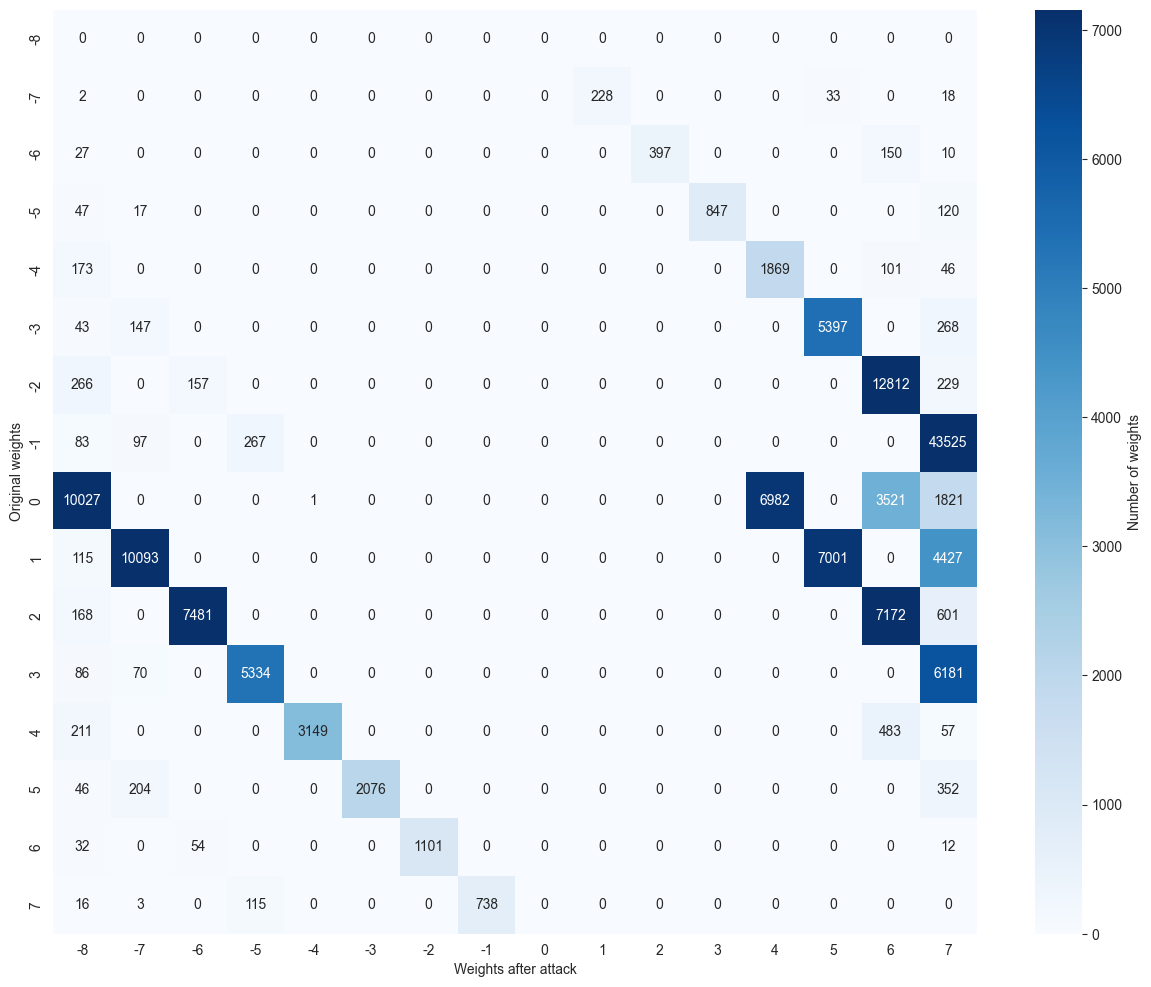

In [42]:
INDEX = ['-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7']
df = pd.DataFrame(heat_4bit, index=INDEX, columns=INDEX)
plt.subplots(figsize=(15, 12))
s = sns.heatmap(df, annot=True, fmt="0.0f", robust=True, cmap='Blues', cbar_kws={'label': 'Number of weights'}, square=True)
s.set_xlabel('Weights after attack')
s.set_ylabel('Original weights')
plt.savefig('./latex_heatmap_minmax/heat_4bit.png')
plt.show()

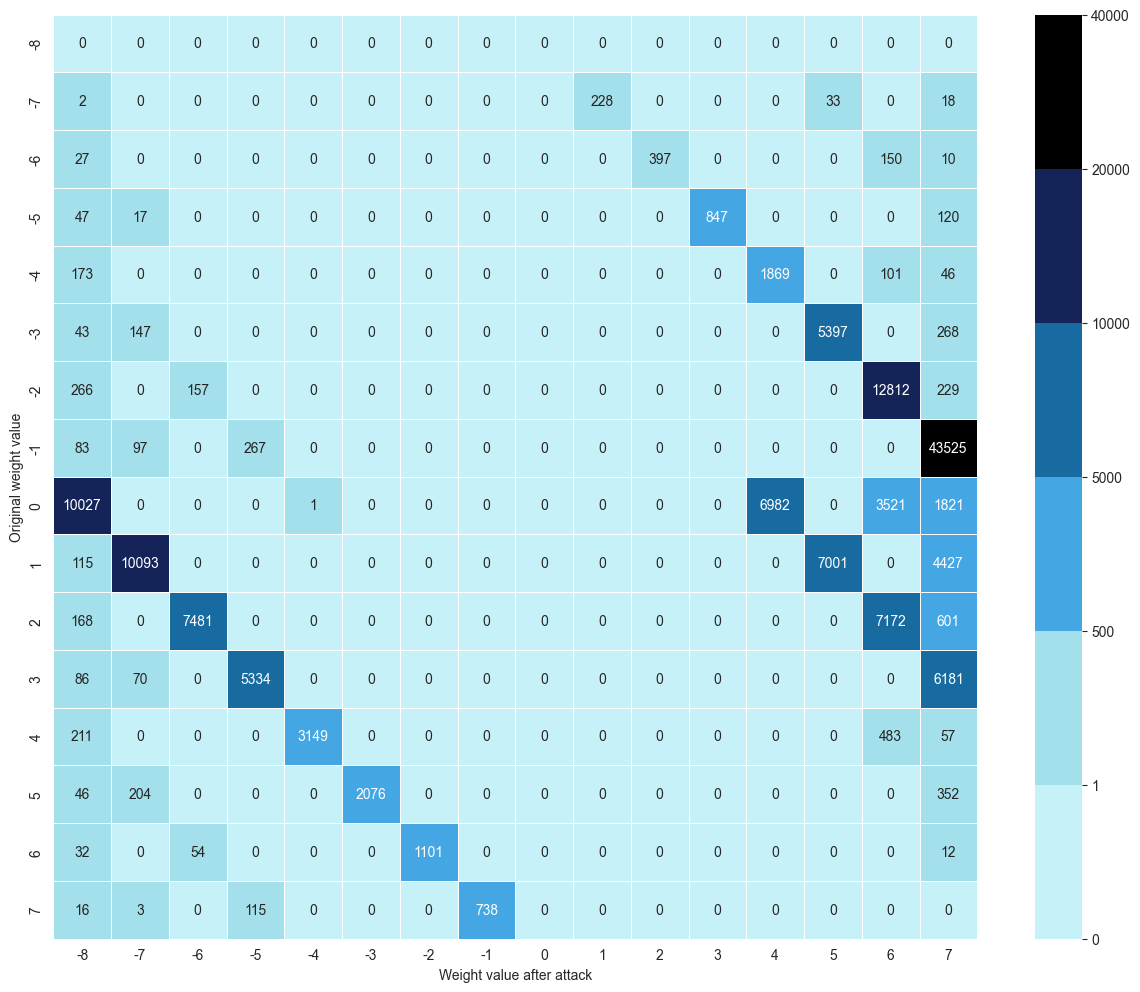

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap

INDEX = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
my_colors = [ '#c7f1f9', '#a4e0eb', '#44a6e3', '#176BA0', '#142459', 'black']
my_cmap = ListedColormap(my_colors)
bounds = [0, 1, 500, 5000, 10000, 20000, 40000]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))
df = pd.DataFrame(heat_4bit, index=INDEX, columns=INDEX)
plt.subplots(figsize=(15, 12))
s = sns.heatmap(df, annot=True, fmt="0.0f", robust=True, cmap=my_cmap, norm=my_norm, square=True, linewidths=0.5, linecolor='white')
plt.tick_params(labelbottom = True, labeltop= False)
s.set_xlabel('Weight value after attack')
s.set_ylabel('Original weight value')
plt.savefig('./latex_heatmap_minmax/heat_4bit_paper.png')
plt.show()

# hamming distance latex 

In [18]:
hd_4bit = np.load('./latex_heatmap_minmax/hd_array_4.npy', allow_pickle=True)
hd_8bit = np.load('./latex_heatmap_minmax/hd_array_8.npy', allow_pickle=True)

In [20]:
all_4bit = np.zeros([8])
all_8bit = np.zeros([8])

for arr in hd_4bit:
    all_4bit += arr
    
for arr in hd_8bit:
    all_8bit += arr

with open('./latex_heatmap_minmax/hd_4bit.txt', 'w') as file:
    y = 1
    for i in range(8):
        file.write(str(y)+ ' bit & ' +str(int(all_4bit[i])) + '\n')
        y += 1
        
    file.write('\n\n--------------------------------------\n\n')
    
    for cur_arr in hd_4bit:
        y = 1
        for i in range(8):
            file.write(str(y)+ ' bit & ' +str(int(cur_arr[i])) + '\n')
            y += 1
        file.write('\n\n--------------------------------------\n\n')
        
with open('./latex_heatmap_minmax/hd_8bit.txt', 'w') as file:
    y = 1
    for i in range(8):
        file.write(str(y)+ ' bit & ' +str(int(all_8bit[i])) + '\n')
        y += 1
        
    file.write('\n\n--------------------------------------\n\n')
    
    for cur_arr in hd_8bit:
        y = 1
        for i in range(8):
            file.write(str(y)+ ' bit & ' +str(int(cur_arr[i])) + '\n')
            y += 1
        file.write('\n\n--------------------------------------\n\n')



In [195]:
print(hd_8bit[3])

[2888.   12.    0.    0.    0.    0.    0.    0.]


In [33]:
weights = np.load("./talbf_results/cifar100/resnet18_quan4_100_targetClass0/weights.npy", allow_pickle=True)
print(weights[69])
weight1 = np.array([1,1], dtype=np.int64)
weight2 = np.array([1,1], dtype=np.int64)
print(weight1)
print(weight2)

print(weights[70])
weights[70] = [weight1, weight2]
print(weights[70])

cal(weights, 4, "./talbf_results/cifar100/resnet18_quan4_100_targetClass0/")

[array([ 1, -1, -1, -1, -1, -1, -1,  0, -1,  2,  1, -1, -1, -1,  1,  1,  3,
        -1, -1,  0, -1, -1, -1, -1,  2,  1, -1, -1, -1, -2, -1, -1, -1, -1,
        -1, -1, -1,  0, -2, -1, -1, -1, -1, -1], dtype=int64)
 array([-7,  7,  7,  7,  7,  7,  7,  4,  7, -6,  5,  7,  7,  7, -7, -7, -5,
         7,  7,  4,  7,  7,  7,  7,  6,  5,  7,  7,  7,  6,  7,  7,  7,  7,
         7,  7,  7, -8,  6,  7,  7,  7,  7,  7], dtype=int64)              ]
[1 1]
[1 1]
[None None]
[array([1, 1], dtype=int64) array([1, 1], dtype=int64)]


# reading from .xls file

In [1]:
import pandas as pd
import numpy as np
import time as time
import math

In [3]:
array_attack = np.array(['./tbfa_results/'])
array_dataset = np.array(['cifar10/', 'cifar100/'])
array_bit = np.array(['8', '4'])



for attack in array_attack:
    
    if attack == './tbfa_results/':
        array_stuff = np.array(['_100_type1/', '_100_type2/', '_100_type3/'])
        
    elif attack == './bfa_results/':
        array_stuff = np.array(['_100/'])
        
    elif attack == './talbf_results/':
        array_stuff = np.array(['_1000_targetClass0/'])
    
    for dataset in array_dataset:
        
        if dataset == 'cifar10/':
            array_nn = np.array([ 'vgg11_bn_quan', 'resnet20_quan'])
            
        elif dataset == 'cifar100/':
            array_nn = np.array(['resnet18_quan', 'vgg11_quan'])
            if attack == './talbf_results/':
                array_stuff = np.array(['_100_targetClass0/'])
        
        for nn in array_nn:
            
            if attack == './talbf_results/' and nn == 'resnet20_quan':
                array_stuff = np.array(['_100/'])
                
            for stuff in array_stuff:
                for bit in array_bit:
                    location = attack + dataset + nn + bit + stuff
                    
                    print(location)
                    
                    ASR_AS = list()
                    ASR_rest = list()
                    PA_ACC = list()
                    i = 0
                    
                    try:

                        # Load the Excel file into a pandas DataFrame
                        df = pd.read_excel(location + 'tables.xls')
                        
                        print(df.columns)
    
                        # Access a specific column by its name
                        column_values_asr_as = df['ASR_AS ']
                        column_values_asr_rest = df['ASR_rest ']
                        column_values_pa_acc = df['PA_ACC']
                        
                        for i in range(len(column_values_asr_as)):
                            
                            # print(column_values_asr_as[i])
                                
                            if math.isnan(column_values_asr_as[i]):
                                # print(column_values_asr_as[i-1])
                                ASR_AS.append(column_values_asr_as[i-1])
                                ASR_rest.append(column_values_asr_rest[i-1])
                                PA_ACC.append(column_values_pa_acc[i-1])
                                
                        ASR_AS.append(list(column_values_asr_as)[-1])
                        ASR_rest.append(list(column_values_asr_rest)[-1])
                        PA_ACC.append(list(column_values_pa_acc)[-1])
                        
                        print(len(ASR_AS))
                                   
                        np.save(location + 'ASR_AS.npy', np.array(ASR_AS))
                        np.save(location + 'ASR_rest.npy', np.array(ASR_rest))
                        np.save(location + 'PA_ACC.npy', np.array(PA_ACC))

                        with open(location + 'ASR.txt', 'w') as file:
                            file.write(location + '\n' + '--'*10 + '\n' + '--'*10 + '\n')
                            file.write('ASR_AS mean: ' + str(np.array(ASR_AS).mean()) + '\nASR_AS std: ' + str(np.array(ASR_AS).std()) + '\n')
                            file.write('ASR_AS min: ' + str(np.array(ASR_AS).min()) + '\nASR_AS max: ' + str(np.array(ASR_AS).max()) + '\n')
                            file.write("--\n")
                            file.write('& $ ' + str(np.array(ASR_AS).mean()) + ' \pm ' + str(format(np.array(ASR_AS).std(), ".2f")) +' $ & '+ str(np.array(ASR_AS).min()) + ' & ' + str(np.array(ASR_AS).max()) + '\n')
                            file.write('--'*10 + '\n' + '--'*10 + '\n')
                            file.write('ASR_rest mean: ' + str(np.array(ASR_rest).mean()) + '\nASR_rest std: ' + str(np.array(ASR_rest).std()) + '\n')
                            file.write('ASR_rest min: ' + str(np.array(ASR_rest).min()) + '\nASR_rest max: ' + str(np.array(ASR_rest).max()) + '\n')
                            file.write("--\n")
                            file.write('& $ ' + str(np.array(ASR_rest).mean()) + ' \pm ' + str(format(np.array(ASR_rest).std(), ".2f")) +' $ & '+ str(np.array(ASR_rest).min()) + ' & ' + str(np.array(ASR_rest).max()) + '\n')
                            file.write('--'*10 + '\n' + '--'*10 + '\n')
                            file.write('PA_ACC mean: ' + str(np.array(PA_ACC).mean()) + '\nPA_ACC std: ' + str(np.array(PA_ACC).std()) + '\n')
                            file.write('PA_ACC min: ' + str(np.array(PA_ACC).min()) + '\nPA_ACC max: ' + str(np.array(PA_ACC).max()) + '\n')
                            file.write("--\n")
                            file.write('& $ ' + str(format(np.array(PA_ACC).mean(), ".2f")) + ' \pm ' + str(format(np.array(PA_ACC).std(), ".2f")) +' $ & '+ str(format(np.array(PA_ACC).min(), ".2f")) + ' & ' + str(format(np.array(PA_ACC).max(), ".2f")) + '\n')
                        
                    except:
                        print(location + 'tables.xls does not exist')
                    
                    

./tbfa_results/cifar10/vgg11_bn_quan8_100_type1/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number', 'offset', 'PA_ACC'], dtype='object')
100
./tbfa_results/cifar10/vgg11_bn_quan4_100_type1/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number', 'offset', 'PA_ACC'], dtype='object')
100
./tbfa_results/cifar10/vgg11_bn_quan8_100_type2/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number', 'offset', 'PA_ACC'], dtype='object')
100
./tbfa_results/cifar10/vgg11_bn_quan4_100_type2/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number', 'offset', 'PA_ACC'], dtype='object')
100
./tbfa_results/cifar10/vgg11_bn_quan8_100_type3/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number', 'offset', 'PA_ACC'], dtype='object')
100
./tbfa_results/cifar10/vgg11_bn_quan4_100_type3/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number', 'offset', 'PA_ACC'], dtype='object')
100
./tbfa_results/cifar10/resnet20_quan8_100_type1/
Index(['Test_ACC', 'ASR_AS ', 'ASR_rest ', 'layer number'

In [2]:
min_max_load = np.load('./latex_heatmap_minmax/min_max_from-avg.npy', allow_pickle=True)
print(min_max_load)

[[[5.6419892271076035 1 './bfa_results/cifar10/vgg11_bn_quan4_100/']
  [7.994113799869196 3
   './tbfa_results/cifar10/resnet20_quan4_100_type3/']]

 [[9.85141397900312 1 './bfa_results/cifar10/vgg11_bn_quan8_100/']
  [12.992737835875092 3
   './tbfa_results/cifar10/resnet20_quan8_100_type2/']]

 [[3.6649559970330574 1 './bfa_results/cifar100/vgg11_quan4_100/']
  [8.0 2 './tbfa_results/cifar100/vgg11_quan4_100_type3/']]

 [[7.490293190047891 1 './bfa_results/cifar100/vgg11_quan8_100/']
  [13.0 3 './tbfa_results/cifar100/vgg11_quan8_100_type3/']]]


# calculation of weights for res18 4-bit 

In [22]:
array_fail = np.array([5,18,52,53,59,70,97,98])
array_suc = np.array([0,1,2,3,10,5,7,8])

weights92 = np.load("./talbf_results/cifar100/resnet18_quan4_100_targetClass0/weights92.npy", allow_pickle=True)
weights25 = np.load("./talbf_results/cifar100/resnet18_quan4_100_targetClass0/weights25_700.npy", allow_pickle=True)

for i,j in zip(array_fail, array_suc):
    weights92[i] = weights25[j]
    
np.save("./talbf_results/cifar100/resnet18_quan4_100_targetClass0/weights.npy", weights92)


In [46]:
weights = np.load("./talbf_results/cifar100/resnet18_quan4_100_targetClass0/weights.npy", allow_pickle=True)



cal(weights, 4, "./talbf_results/cifar100/resnet18_quan4_100_targetClass0/")

./talbf_results/cifar100/resnet18_quan4_100_targetClass0/       save location done
6.423076923076923 1 8.0 2


(6.423076923076923, 1, 8.0, 2)

In [24]:
print(weights[59])

[array([-1, -3, -2, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -2, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -2, -1, -1,  1,
         3,  2, -1, -1, -2, -1, -1, -1, -1, -2, -1, -1, -2], dtype=int64)
 array([ 7,  5,  6,  7,  7,  7,  7,  7,  7,  7,  7,  4,  7,  6,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  7,  7,  6,  7,  7, -7,
        -5, -6,  7,  7,  6,  7,  7,  7,  7,  6,  7,  7,  6], dtype=int64)  ]


# vgg11 4-bit weights suc

In [3]:

weights = np.load("D:\DP\DP\Code\T-BFA_TA-LBF\cifar100_vgg11_int4\\talbf_results\cifar100\\vgg11_quan4_1000_targetClass0\weights.npy", allow_pickle=True)

In [4]:
number = 0
array_index = list()
for i in range(len(weights)):
    
    if weights[i][0] is not None:
        
       
        # if len(weights[i][0]) > 51:
        if len(weights[i][0]) > 51:
            print('-----------------')
            print(weights[i][0].shape)
            number += 1
            array_index.append(i)
        # print(weight[1])
    
print(number)
print(array_index)
np.save("D:\DP\DP\Code\T-BFA_TA-LBF\cifar100_vgg11_int4\\talbf_results\cifar100\\vgg11_quan4_1000_targetClass0\weights_suc_30_index.npy", array_index)
    # print('-----------------')

-----------------
(124,)
-----------------
(52,)
-----------------
(102,)
-----------------
(169,)
-----------------
(121,)
-----------------
(183,)
-----------------
(173,)
-----------------
(178,)
-----------------
(173,)
-----------------
(192,)
-----------------
(125,)
-----------------
(180,)
-----------------
(143,)
-----------------
(168,)
-----------------
(198,)
-----------------
(171,)
-----------------
(180,)
-----------------
(138,)
-----------------
(187,)
-----------------
(131,)
-----------------
(89,)
-----------------
(77,)
-----------------
(76,)
-----------------
(79,)
-----------------
(158,)
-----------------
(171,)
-----------------
(173,)
-----------------
(178,)
-----------------
(181,)
-----------------
(185,)
30
[0, 7, 8, 11, 12, 22, 23, 31, 32, 41, 51, 52, 55, 59, 63, 68, 70, 85, 86, 88, 91, 92, 93, 94, 96, 97, 98, 100, 104, 105]


In [7]:
weights_all = np.load("D:\DP\DP\Code\T-BFA_TA-LBF\\talbf_results\cifar100\\vgg11_quan4_100_targetClass0\weights_all.npy", allow_pickle=True)
weights_index = np.load("D:\DP\DP\Code\T-BFA_TA-LBF\\talbf_results\cifar100\\vgg11_quan4_100_targetClass0\weights_suc_30_index.npy", allow_pickle=True)
print(weights_index)

[  0   7   8  11  12  22  23  31  32  41  51  52  55  59  63  68  70  85
  86  88  91  92  93  94  96  97  98 100 104 105]


In [10]:
weights = list()

for i in weights_index:
    weights.append(weights_all[i])
    
print(weights[0])
print(len(weights))

np.save("D:\DP\DP\Code\T-BFA_TA-LBF\\talbf_results\cifar100\\vgg11_quan4_100_targetClass0\weights.npy", weights)

[array([-2, -1, -3, -2, -2, -1, -2, -2, -2, -2, -1, -2, -2, -1, -2, -1, -2,
        -1, -1, -2, -1, -2, -3, -1, -1, -1,  4,  4, -3, -1,  1, -2,  3, -1,
        -2, -1, -1, -1, -2,  3,  3,  3, -1, -1,  2,  1,  3,  3,  3,  2, -1,
         2, -2, -1, -1, -1, -1, -1, -2, -1, -2, -3, -1, -1, -1, -2, -3, -1,
        -2, -2, -3, -2,  5,  5,  3, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1,
        -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1,
        -1, -1, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -2, -1, -2, -1, -1,
        -1, -2, -1, -1, -1], dtype=int64)
 array([ 6,  7,  5,  6,  6,  7,  6,  6,  6,  6,  7,  6,  6,  7,  6,  7,  6,
         7,  7,  6,  7,  6,  5,  7,  7,  7, -4, -4,  5,  7, -7,  6, -5,  7,
         6,  7,  7,  7,  6, -5, -5, -5,  7,  7, -6, -7, -5, -5, -5, -6,  7,
        -6,  6,  7,  7,  7,  7,  7,  6,  7,  6,  5,  7,  7,  7,  6,  5,  7,
         6,  6,  5,  6, -3, -3, -5,  7,  7,  7,  7,  7,  6,  7,  7,  7,  7,
         7,  7,  7,  7,  6,  6,  7,  7,  7,  7